In [1]:
push!(LOAD_PATH, "../src/")
using NSHeat
include("../src/PhysicalConstants.jl");

┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/NSHeat.ji for NSHeat [top-level]
└ @ Base loading.jl:1184


In [2]:
using Plots
pyplot()

┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


Plots.PyPlotBackend()

# Plots for NS internal structure

In [100]:
eos = "APR_EOS_Cat_core.dat"
tov = "Prof_APR_Cat_1.4.dat"
dMoverM = 0.578e-18/1.732
del_slice = 10.0

Tinf0 = 1.e-1
tyr0 = 0.1
eta_e_inf0 = 1e-30
eta_mu_inf0 = 1e-30

SFtype_n = "3P2m0"
SFtype_p = "1S0"
gapmodel_ns = ["a", "b", "c"]

gapmodel_ps = ["AO", "CCDK"]
# not used for cooling
noneq = false
P0 = 1e-3
Pnow = 5.8e-3
Pdotnow = 5.7e-20
Znpe = 1.e-60
Znpmu = 1.2e-60
Znp = 4.e-61
Wnpe = -1.5e-13
Wnpmu = -2.e-13

solver = "CVODE_BDF"
tyrf = 1e7
reltol = 1e-3
abstol = 1e-6
dt = 0.05
myalpha=10.0
beta=10.0

output_dir = "nothing"
modelname = "test"

params=[modelname, eos, tov, dMoverM, del_slice,
        Tinf0, tyr0, eta_e_inf0, eta_mu_inf0,
        SFtype_n, gapmodel_n, SFtype_p, gapmodel_p,
        noneq, P0, Pnow, Pdotnow,
        Znpe, Znpmu, Znp, Wnpe, Wnpmu,
        solver, tyrf, reltol, abstol, dt,
        myalpha, beta,
        output_dir];

In [101]:
gapmodel_n = gapmodel_ns[1]
gapmodel_p = gapmodel_ps[1]
model, core, env, var = setup(params...);

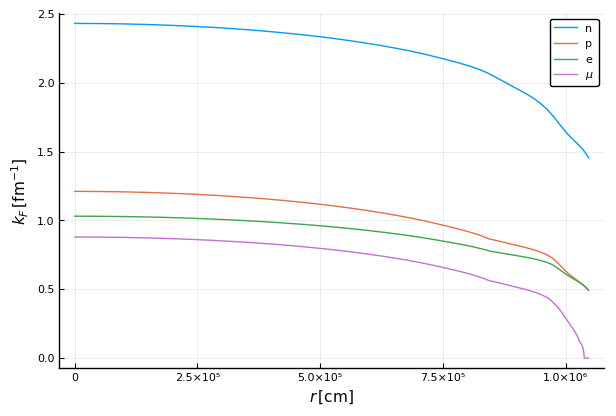

In [118]:
plot(core.r_core, core.kFn, label="n")
plot!(core.r_core, core.kFp, label="p")
plot!(core.r_core, core.kFe, label="e")
plot!(core.r_core, core.kFmu, label="\$ \\mu \$")
xlabel!("\$ r\\, \\mathrm{[cm]}\$")
ylabel!("\$ k_F\\, \\mathrm{[fm^{-1}]}\$")
savefig("kF.pdf")

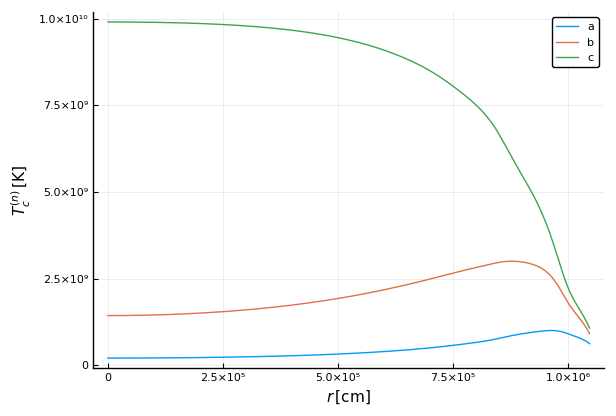

In [119]:
plot()
for gapmodel_n = gapmodel_ns
    params[11] = gapmodel_n
    model, core, env, var = setup(params...)
    plot!(core.r_core, core.Tc_n, label=model.gapmodel_n)
end
xlabel!("\$ r\\, \\mathrm{[cm]}\$")
ylabel!("\$ T_c^{(n)}\\, \\mathrm{[K]}\$")
current()
savefig("Tc_n.pdf")

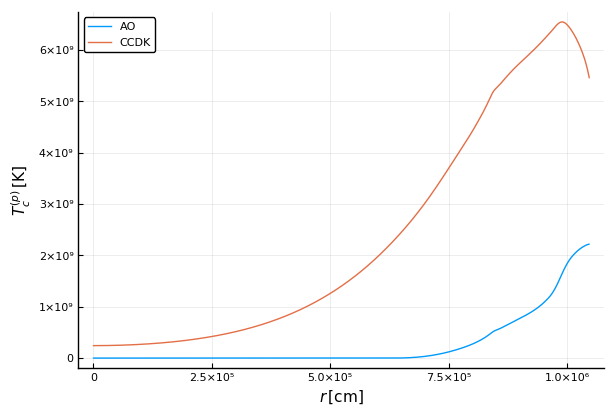

In [120]:
plot()
for gapmodel_p = gapmodel_ps
    params[13] = gapmodel_p
    model, core, env, var = setup(params...)
    plot!(core.r_core, core.Tc_p, label=model.gapmodel_p)
end
xlabel!("\$ r\\, \\mathrm{[cm]}\$")
ylabel!("\$ T_c^{(p)}\\, \\mathrm{[K]}\$")
current()
savefig("Tc_p.pdf")

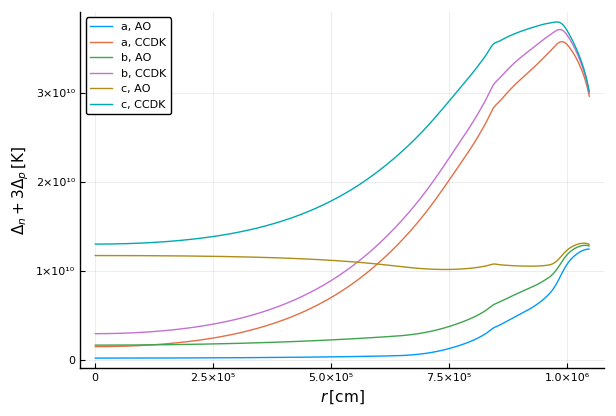

In [121]:
plot()
for gapmodel_n = gapmodel_ns, gapmodel_p = gapmodel_ps
    params[11] = gapmodel_n
    params[13] = gapmodel_p
    model, core, env, var = setup(params...)
    plot!(core.r_core, (core.Tc_n .* 1.188) .+ (core.Tc_p .* 1.764) .* 3, label="$(model.gapmodel_n), $(model.gapmodel_p)")
end
xlabel!("\$ r\\, \\mathrm{[cm]}\$")
ylabel!("\$ \\Delta_n + 3 \\Delta_p \\, \\mathrm{[K]}\$")
current()
savefig("dn_3dp.pdf")

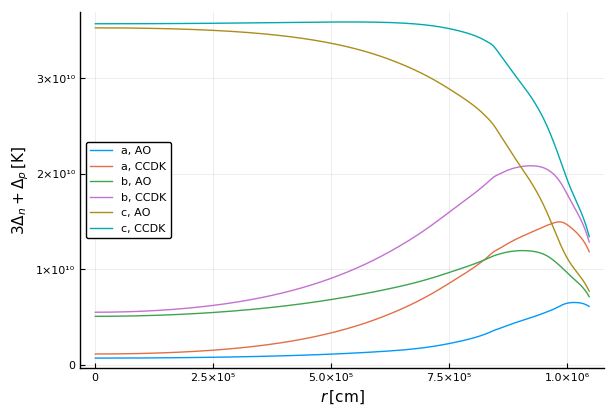

In [122]:
plot()
for gapmodel_n = gapmodel_ns, gapmodel_p = gapmodel_ps
    params[11] = gapmodel_n
    params[13] = gapmodel_p
    model, core, env, var = setup(params...)
    plot!(core.r_core, (core.Tc_n .* 1.188) .* 3 .+ (core.Tc_p .* 1.764), label="$(model.gapmodel_n), $(model.gapmodel_p)")
end
xlabel!("\$ r\\, \\mathrm{[cm]}\$")
ylabel!("\$ 3\\Delta_n + \\Delta_p \\, \\mathrm{[K]}\$")
current()
savefig("3d_dp.pdf")

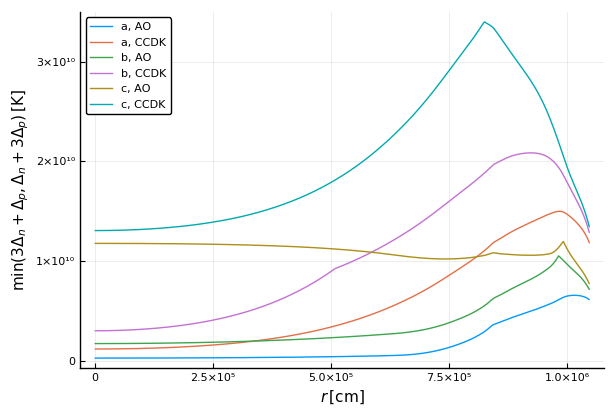

In [123]:
plot()
for gapmodel_n = gapmodel_ns, gapmodel_p = gapmodel_ps
    params[11] = gapmodel_n
    params[13] = gapmodel_p
    model, core, env, var = setup(params...)
    plot!(core.r_core,
            map((x,y)->min(x,y), 
            (core.Tc_n .* 1.188) .* 3 .+ (core.Tc_p .* 1.764), 
            (core.Tc_n .* 1.188) .+ (core.Tc_p .* 1.764) .* 3),
            label="$(model.gapmodel_n), $(model.gapmodel_p)")
end
xlabel!("\$ r\\, \\mathrm{[cm]}\$")
ylabel!("\$\\mathrm{min}( 3\\Delta_n + \\Delta_p, \\Delta_n + 3\\Delta_p) \\, \\mathrm{[K]}\$")
current()
savefig("min_dn3dp_3pddn.pdf")